In [1]:
# Import data
import os 
import numpy as np
import pandas as pd

_PATH = os.path.join("..","datasets", "fall_detection")

def load(file, _path = _PATH):
    csv_path = os.path.join(_path,file)
    return pd.read_csv(csv_path)

# Fall DF

In [2]:
fall_df = load("fall.csv")
fall_df.head()

26  26.25  26.75   27.5  27.5.1  27.25  27.25.1  27.25.2  26.25.1  \
0  26.50  26.75  26.75  27.25   27.25  27.50    27.75    27.75    26.75   
1  26.50  26.75  27.25  27.50   27.25  27.25    27.25    27.25    26.75   
2  26.75  27.00  27.25  27.50   27.50  27.75    28.00    28.00    27.00   
3  26.50  26.50  26.50  26.75   27.00  27.25    27.25    27.50    26.50   
4  26.25  26.25  26.25  26.50   27.00  27.00    27.25    27.75    26.25   

    26.5  ...   28.1  27.75.3  28.25.4  28.25.5  28.25.6  28.25.7   29.5  \
0  26.75  ...  27.75    27.75    30.50    30.00    29.75    28.25  28.25   
1  26.75  ...  27.75    27.75    28.00    27.25    27.25    28.00  28.00   
2  27.00  ...  27.75    27.75    29.50    29.50    29.00    27.50  27.50   
3  26.50  ...  28.25    28.75    26.75    26.25    26.25    26.25  27.00   
4  26.50  ...  27.75    27.25    26.50    26.50    26.50    26.50  26.50   

   29.5.1  27.75.4  27.5.6  
0   27.50    27.50   27.75  
1   27.75    27.75   27.75  
2   27.50    27.75   27.75  
3   27.00    28.25   29.00  
4   26.75    27.25   27.25  

[5 rows x 64 columns]

# NoFall DF

In [3]:
nofall_df = load("nofall.csv")
nofall_df.head()

26.5  26.5.1  26.5.2  26.5.3  26.5.4  26.75     27   27.1  26.75.1  \
0  27.25   26.75   26.50   26.50   26.50  26.50  27.00  27.50    27.50   
1  26.50   26.50   26.50   26.50   26.75  27.00  27.00  27.50    27.50   
2  26.75   26.75   26.75   26.50   26.50  26.50  27.25  27.25    27.50   
3  26.25   26.75   26.50   26.75   26.50  26.75  27.00  27.25    27.50   
4  26.50   26.50   26.50   26.25   26.25  27.00  27.00  27.00    27.25   

   26.75.2  ...  26.5.17  26.5.18  29.25.6   29.1   29.2    28  27.75.1  \
0    27.25  ...     26.5    26.50     29.0  26.75  26.75  26.5    26.75   
1    26.75  ...     26.5    26.50     27.0  27.00  26.50  26.5    26.50   
2    27.00  ...     26.5    26.50     27.0  27.00  26.75  26.5    26.50   
3    26.75  ...     26.5    26.25     27.0  26.50  26.50  26.5    26.50   
4    26.75  ...     26.5    26.50     26.5  26.50  26.50  26.5    26.25   

   27.11  26.75.11  26.75.12  
0  26.75     26.75     27.00  
1  26.50     26.75     26.75  
2  26.50     26.50     27.00  
3  26.50     26.50     27.00  
4  26.25     26.75     26.75  

[5 rows x 64 columns]

# Process Data

In [4]:
def split_video (df,delimiter):
    vid = []
    allvideos = []
    count = 0

    for i in range(len(df)):
        sequence = df.iloc[i]
        vid.append([sequence])
            
        if all(val == delimiter for val in sequence):
            allvideos.append(vid)
            count +=1
            vid = []
            continue
            
    print(f"{count} Videos detected")
    return allvideos
    
fall_videos = split_video(fall_df,-1)

25 Videos detected


In [5]:
no_fall_videos = split_video(nofall_df,-1)

26 Videos detected


# Process Video

In [110]:
from matplotlib import pyplot as plt
import numpy as np
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

def play_video(video,size,vmin=25,vmax=30):   
        video = np.array(video)
        print(f"Video Shape : {video.shape}")
        print(f"Finding Dimensions {size} x {size}")
        # Reshape Video to fit 8x8
        # Video is in shape of (number of frames, 1 (1d array for sensor), 8,8 (8x8 sensor))
        video = video.reshape(len(video), 1, size, size)
        print(f"New Video Shape : {video.shape}")

        fig, ax = plt.subplots()
        print(video[0][0])
        im = ax.imshow(video[0][0], cmap='coolwarm', interpolation='nearest', vmin=vmin, vmax=vmax)

        def init():
            im.set_data(video[0][0])
            return [im]

        def animate(i):
            im.set_array(video[i][0])
            return [im]
    
        anim = FuncAnimation(fig, animate, init_func=init, frames=len(video), interval=200, blit=True)

        # Display the animation in the notebook using HTML
        display(HTML(anim.to_jshtml()))
        anim.save('basic_animation.mp4', fps=10, extra_args=['-vcodec', 'libx264'])

## Cleaning Data

## Median Filter

Video Shape : (35, 1, 64)
Finding Dimensions 8 x 8
New Video Shape : (35, 1, 8, 8)
[[26.25 26.25 26.25 26.5  26.5  26.75 26.75 26.75]
 [26.5  26.5  26.25 26.5  26.5  26.75 26.75 26.75]
 [26.5  26.5  26.5  26.5  26.5  26.75 26.75 26.75]
 [26.5  26.5  26.5  26.5  26.5  26.75 26.75 26.75]
 [26.75 26.5  26.5  26.5  26.5  26.5  26.5  26.5 ]
 [26.5  26.5  26.5  26.25 26.25 26.25 26.5  26.5 ]
 [26.5  26.5  26.5  26.5  26.25 26.25 26.25 26.5 ]
 [26.5  26.5  26.5  26.5  26.5  26.5  26.5  26.5 ]]


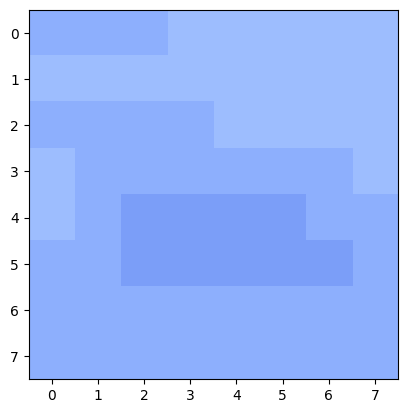

In [151]:
from scipy import ndimage, datasets

#for video in fall_videos:
processed_fall_video = ndimage.median_filter(fall_videos[7],5)
play_video(processed_fall_video,8)

## No Filter

Video Shape : (35, 1, 64)
Finding Dimensions 8 x 8
New Video Shape : (35, 1, 8, 8)
[[26.   26.25 26.5  26.5  26.5  26.75 26.75 26.75]
 [26.25 26.5  26.5  26.5  26.5  26.75 26.75 26.75]
 [26.5  26.5  26.5  26.5  26.5  26.75 26.75 26.75]
 [26.5  26.5  26.5  26.5  26.5  26.75 26.75 26.75]
 [26.75 26.5  26.5  26.25 26.5  26.5  26.5  26.75]
 [26.75 26.5  26.5  26.25 26.25 26.25 26.5  26.5 ]
 [26.5  26.5  26.5  26.5  26.5  26.25 26.25 26.25]
 [26.5  26.5  26.5  26.5  26.5  26.25 26.5  26.5 ]]


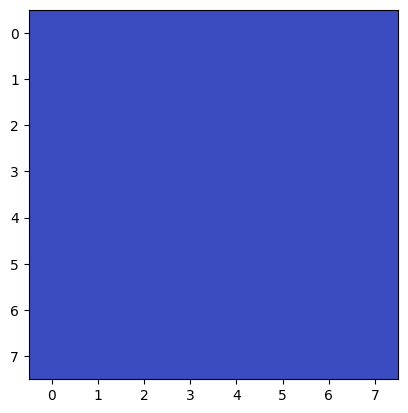

In [153]:
play_video(fall_videos[7],8)

In [ ]:
#for video in no_fall_videos:
    #play_video(video)

In [ ]:
#play_video(fall_videos[7])

## Median Subtraction

Video Shape : (35, 1, 64)
Finding Dimensions 8 x 8
New Video Shape : (35, 1, 8, 8)
[[-0.5  -0.25  0.    0.    0.    0.25  0.25  0.25]
 [-0.25  0.    0.    0.    0.    0.25  0.25  0.25]
 [ 0.    0.    0.    0.    0.    0.25  0.25  0.25]
 [ 0.    0.    0.    0.    0.    0.25  0.25  0.25]
 [ 0.25  0.    0.   -0.25  0.    0.    0.    0.25]
 [ 0.25  0.    0.   -0.25 -0.25 -0.25  0.    0.  ]
 [ 0.    0.    0.    0.    0.   -0.25 -0.25 -0.25]
 [ 0.    0.    0.    0.    0.   -0.25  0.    0.  ]]


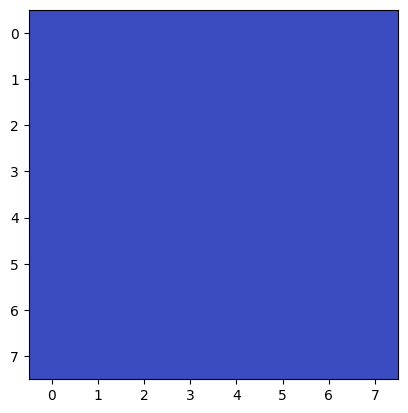

In [154]:
processed_fall_video = np.array([
    frame - np.median(frame)
    for frame in fall_videos[7]
])
    
play_video(processed_fall_video,8,0,0.5)

## Edge Detection

Video Shape : (23, 1, 64)
Finding Dimensions 8 x 8
New Video Shape : (23, 1, 8, 8)
[[  0   0 255   0   0   0   0 255]
 [  0   0   0   0   0 255   0 255]
 [  0   0 255   0   0   0   0 255]
 [  0 255   0   0   0   0   0 255]
 [  0 255   0   0   0   0 255   0]
 [255   0 255   0   0 255   0 255]
 [  0   0   0 255   0 255   0 255]
 [  0   0 255   0 255   0   0   0]]


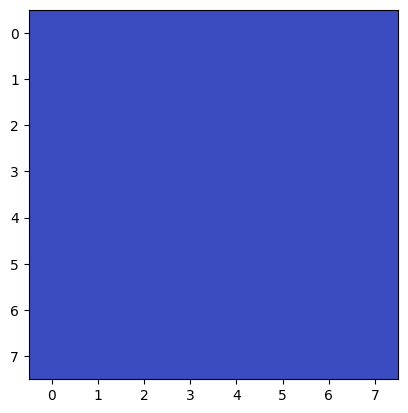

In [17]:
import cv2

canny = []

for frame in fall_videos[7]:
    frame = np.array(frame, dtype=np.uint8)
    frame = cv2.normalize(frame, None, 0, 255, cv2.NORM_MINMAX)

    lower_percentile = np.percentile(frame, 10)
    upper_percentile = np.percentile(frame, 90)

    edges = cv2.Canny(frame, threshold1=lower_percentile, threshold2=upper_percentile)
    
    canny.append(edges)
    
play_video(canny,8)

## Edge Detection With Zoom

Video Shape : (35, 1, 4096)
Finding Dimensions 64 x 64
New Video Shape : (35, 1, 64, 64)
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


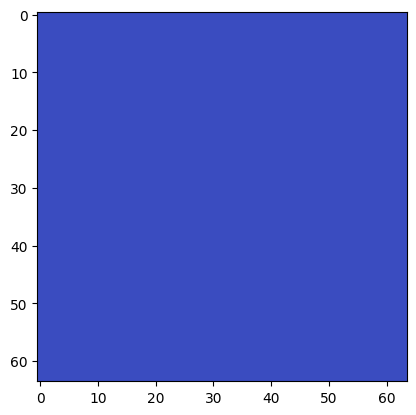

In [155]:
import cv2
import numpy as np
from scipy.ndimage import zoom

canny = []

for frame in fall_videos[7]:
    # Convert the frame to uint8
    frame = np.array(frame, dtype=np.uint8)

    frame = frame.reshape(8,8)
    
    # Resize the frame using zoom (scaling by factor of 8)
    frame_resized = zoom(frame, 8)
    
    #print(f"Zoom Results : {frame_resized}")
    #print(f"Before Resize : {frame_resized.shape}")
    
    # Calculate dimensions after zoom
    new_height, new_width = frame_resized.shape

     # If the dimensions are not square, pad the frame to make it square
    if new_height != new_width:
        max_dim = max(new_height, new_width)

        # Pad the frame with zeros (black pixels)
        padded_frame = np.zeros((max_dim, max_dim), dtype=np.uint8)

        # Center the resized frame in the padded frame
        # Calculate the top-left corner position to place the resized frame in the center
        top_left_y = (max_dim - new_height) // 2
        top_left_x = (max_dim - new_width) // 2

        # Copy the resized frame into the center of the padded frame
        padded_frame[top_left_y:top_left_y + new_height, top_left_x:top_left_x + new_width] = frame_resized

        frame_resized = padded_frame  # Now it's square
        
    #print(f"After Resize : {frame_resized.shape}")

    # Normalize the resized (and possibly padded) frame to 0-255
    frame_resized = cv2.normalize(frame_resized, None, 0, 255, cv2.NORM_MINMAX)

    # Calculate thresholds based on percentiles
    lower_percentile = np.percentile(frame_resized, 10)
    upper_percentile = np.percentile(frame_resized, 90)

    # Apply Canny edge detection
    edges = cv2.Canny(frame_resized, threshold1=lower_percentile, threshold2=upper_percentile)

    # Append the edges (canny result) for the frame
    canny.append(edges)

canny = np.array(canny).reshape(len(fall_videos[7]),1,64*64)
# Display the processed frames
play_video(canny,64)


## Median Filter With Zoom

Video Shape : (35, 1, 4096)
Finding Dimensions 64 x 64
New Video Shape : (35, 1, 64, 64)
[[26.00951615 26.01780485 26.02324492 ... 26.74849906 26.74955676
  26.74957307]
 [26.01780485 26.01828974 26.03830617 ... 26.74849906 26.74955676
  26.74957307]
 [26.0228979  26.03830617 26.04451076 ... 26.74848217 26.74951595
  26.74955676]
 ...
 [26.49487673 26.49487673 26.49516317 ... 26.47835047 26.47384081
  26.47384081]
 [26.49850792 26.49850792 26.49851904 ... 26.49938283 26.49443186
  26.49443186]
 [26.49850792 26.49851904 26.49855372 ... 26.5        26.49938283
  26.49443186]]


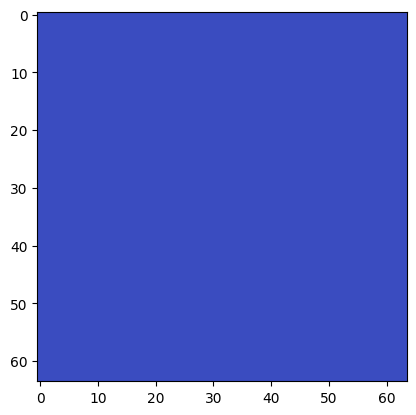

In [156]:
import cv2
import numpy as np
from scipy.ndimage import zoom

resized_frames = []

for frame in fall_videos[7]:
    # Convert the frame to uint8
    frame = np.array(frame)
    frame = frame.reshape(8,8)
    
    # Resize the frame using zoom (scaling by factor of 8)
    frame_resized = zoom(frame, 8)

    frame_resized = ndimage.median_filter(frame_resized,5)
    
    resized_frames.append(frame_resized)

resized_frames = np.array(resized_frames).reshape(len(fall_videos[7]),1,64*64)
    
# Display the processed frames
play_video(resized_frames,64)


## Zoom Only

Video Shape : (35, 1, 4096)
Finding Dimensions 64 x 64
New Video Shape : (35, 1, 64, 64)
[[26.         26.00478472 26.01828974 ... 26.74850574 26.74957307
  26.75      ]
 [26.00464618 26.00951615 26.02324492 ... 26.74849906 26.74955676
  26.74998021]
 [26.01780485 26.0228979  26.03721096 ... 26.74848217 26.74951595
  26.74993073]
 ...
 [26.49477503 26.49487673 26.49516317 ... 26.47835047 26.47384081
  26.4720322 ]
 [26.49850715 26.49850792 26.49851904 ... 26.49938283 26.49443186
  26.49245012]
 [26.5        26.49996042 26.49986146 ... 26.50716454 26.50204701
  26.5       ]]


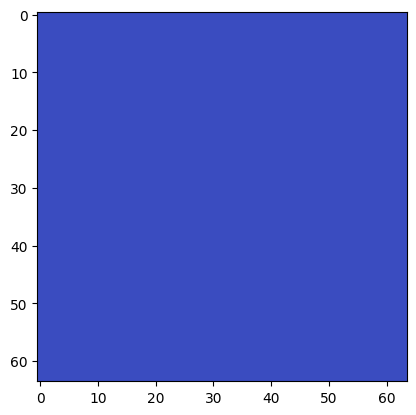

In [157]:
import cv2
import numpy as np
from scipy.ndimage import zoom

resized_frames = []

for frame in fall_videos[7]:
    # Convert the frame to uint8
    frame = np.array(frame)
    frame = frame.reshape(8,8)
    
    # Resize the frame using zoom (scaling by factor of 8)
    frame_resized = zoom(frame, 8)
    
    resized_frames.append(frame_resized)

resized_frames = np.array(resized_frames).reshape(len(fall_videos[7]),1,64*64)
    
# Display the processed frames
play_video(resized_frames,64)


## Gaussian Blur

0.07110654393216292
Video Shape : (35, 1, 64, 64)
Finding Dimensions 64 x 64
New Video Shape : (35, 1, 64, 64)
[[-0.0558393  -0.05129119 -0.05686467 ...  0.00074204  0.00146565
   0.00135599]
 [-0.05125779 -0.05452726 -0.04556272 ...  0.00073859  0.00146461
   0.00135579]
 [-0.0570865  -0.0454709  -0.05042479 ...  0.00071248  0.00142105
   0.00133897]
 ...
 [ 0.00153654  0.00139499  0.00127173 ...  0.02775128  0.02429008
   0.02469933]
 [ 0.00417375  0.00405607  0.00372549 ...  0.03512786  0.03128662
   0.03171901]
 [ 0.00379803  0.00370047  0.00341915 ...  0.0310176   0.03153212
   0.02702178]]


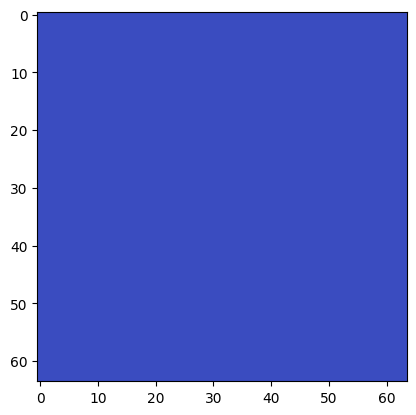

In [161]:
import cv2
import numpy as np
from scipy.ndimage import zoom, median_filter

resized_frames = []


for frame in fall_videos[7]:
    # Convert frame to numpy array and reshape to 8x8
    frame = np.array(frame).reshape(8, 8)
    
    # Resize frame to 64x64 using zoom
    frame_resized = zoom(frame, 8)  # Output should be (64, 64)
    
    # Apply median filter to reduce noise
    frame_resized = median_filter(frame_resized, size=5)
    
    # Apply Gaussian blur for low-pass filtering
    blurred_frame = cv2.GaussianBlur(frame_resized, (15, 15), 0)
    
    # Apply high-pass filtering (amplify details by subtracting blurred image)
    frame_high_pass = cv2.subtract(frame_resized, blurred_frame)

    #print(frame_high_pass)
    # Normalize pixel values for display or model input
    #frame_high_pass = np.clip(frame_high_pass, 0, 255).astype(np.uint8)
    
    # Append processed frame
    resized_frames.append(frame_high_pass)

# Convert to numpy array and reshape for video playback
resized_frames = np.array(resized_frames).reshape(len(fall_videos[7]), 1, 64, 64)

print(np.percentile(resized_frames, 95))

# Function to play video
play_video(resized_frames, 64,vmin=0.035,vmax=0.33)


## Bilateral Filter

Video Shape : (35, 1, 64, 64)
Finding Dimensions 64 x 64
New Video Shape : (35, 1, 64, 64)
[[26 26 26 ... 26 26 26]
 [26 26 26 ... 26 26 26]
 [26 26 26 ... 26 26 26]
 ...
 [26 26 26 ... 26 26 26]
 [26 26 26 ... 26 26 26]
 [26 26 26 ... 26 26 26]]


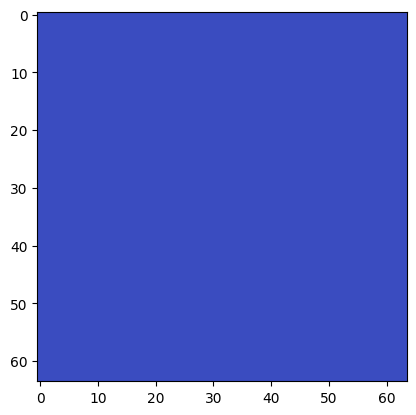

In [163]:
import cv2
import numpy as np
from scipy.ndimage import zoom, median_filter

resized_frames = []

for frame in fall_videos[7]:
    # Convert frame to numpy array and reshape to 8x8
    frame = np.array(frame, dtype=np.float32).reshape(8, 8)
    
    # Resize frame to 64x64 using zoom
    frame_resized = zoom(frame, 8)  # Output should be (64, 64)
    
    # Normalize frame to range [0, 255] for uint8
    frame_resized = np.clip(frame_resized, 0, 255).astype(np.uint8)
    
    frame_filtered = cv2.bilateralFilter(frame_resized, 9, 75, 75)

    # Thesholding to reduce noise
    
    # Append processed frame
    resized_frames.append(frame_filtered)

# Convert to numpy array and reshape for video playback
resized_frames = np.array(resized_frames).reshape(len(fall_videos[7]), 1, 64, 64)

# Function to play video
play_video(resized_frames, 64,24,30)


# Bilateral Filter With Thresholding

27.0
Video Shape : (35, 1, 64, 64)
Finding Dimensions 64 x 64
New Video Shape : (35, 1, 64, 64)
[[26 26 26 ... 26 26 26]
 [26 26 26 ... 26 26 26]
 [26 26 26 ... 26 26 26]
 ...
 [26 26 26 ... 26 26 26]
 [26 26 26 ... 26 26 26]
 [26 26 26 ... 26 26 26]]


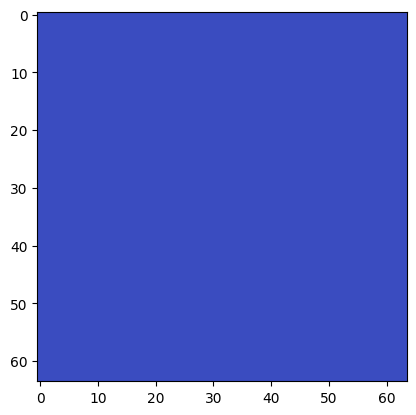

In [149]:
import cv2
import numpy as np
from scipy.ndimage import zoom, median_filter

resized_frames = []

for frame in fall_videos[7]:
    # Convert frame to numpy array and reshape to 8x8
    frame = np.array(frame, dtype=np.float32).reshape(8, 8)
    
    # Resize frame to 64x64 using zoom
    frame_resized = zoom(frame, 8)  # Output should be (64, 64)
    
    # Normalize frame to range [0, 255] for uint8
    frame_resized = np.clip(frame_resized, 0, 255).astype(np.uint8)
    
    frame_filtered = cv2.bilateralFilter(frame_resized, 9, 75, 75)

    
    # Append processed frame
    resized_frames.append(frame_filtered)

# Convert to numpy array and reshape for video playback
resized_frames = np.array(resized_frames).reshape(len(fall_videos[7]), 1, 64, 64)

print(np.median(resized_frames))

# Function to play video
play_video(resized_frames, 64,27,29)
